In [1]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import RegularGridInterpolator
from scipy.integrate import odeint
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from scipy import interpolate
plt.rc('text', usetex=True)
plt.rc('font', family='calibri')

In [2]:
dataKerr=np.loadtxt('sol_alpha000000_beta100000_tol006_it-3_rH100_chi090_n061_m31.dat')

In [3]:
a0=0.9
xgrid=61
ygrid=31

In [4]:
def F1(x,theta,a0,rh):
    m0=2*rh/np.sqrt(1-a0**2)
    f1=(1-(1-x)**2)**2
    f2=2*m0*(1+(1-x)**2)*(1-x)/rh
    f3=2*m0**2*(1-x)**2/rh**2
    f4=(m0**2-4*rh**2)*(1-x)**2*np.sin(theta)**2/rh**2
    return f1+f2+f3-f4
def F2(x,theta,a0,rh):
    m0=2*rh/np.sqrt(1-a0**2)
    f1=2*m0**2*(1-x)**2+rh**2*(2-x)**2*x**2-2*m0*rh*(-2+4*x-3*x**2+x**3)
    f2=rh**2*(-1*m0**2+4*rh**2)*(2-x)**2*(-1+x)**2*x**2*np.sin(theta)**2
    return (f1**2+f2)/rh**4

def F3(x,theta,a0,rh):
    m0=2*rh/np.sqrt(1-a0**2)
    f1=-2*m0*np.sqrt(m0**2-4*rh**2)*(1-x)**2*(m0*(x-1)-rh*(2-2*x+x**2))
    return f1/rh**3

def FGRbar(x,theta,a0,rh):
    return (x-2)**2*F1(x,theta,a0,rh)/F2(x,theta,a0,rh)

def MGRbar(x,theta,a0,rh):
    return (x-2)**2*F1(x,theta,a0,rh)**2/F2(x,theta,a0,rh)

def LGRbar(x,theta,a0,rh):
    return (x-2)**2

def WGRbar(x,theta,a0,rh):
    return F3(x,theta,a0,rh)/F2(x,theta,a0,rh)

In [5]:
fnumber=2
mnumber=6
lnumber=10
wnumber=14

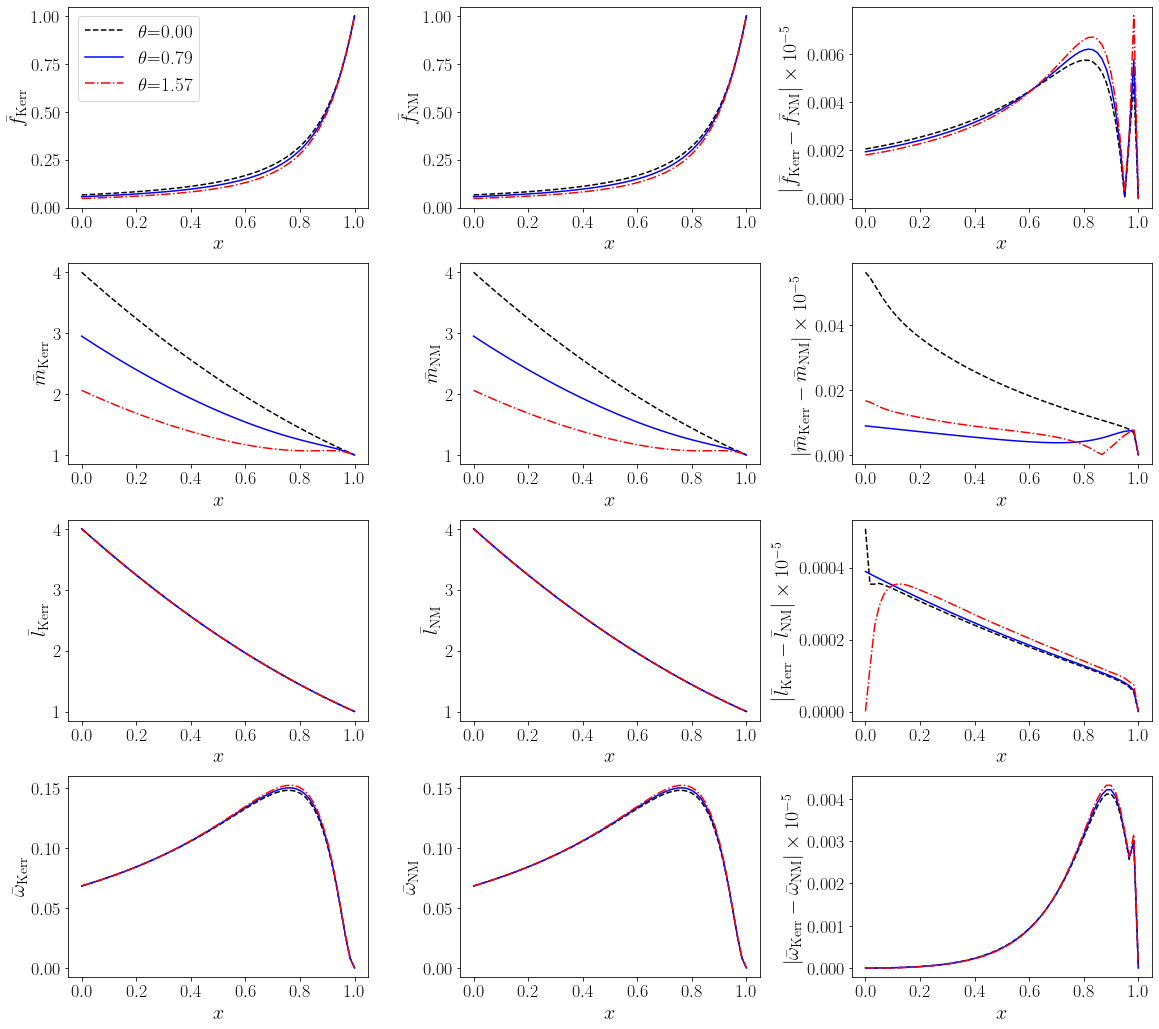

In [6]:
fig=plt.figure(figsize=(5.4*3,3.6*4))
fig.subplots_adjust(hspace=0.04) 
fig.subplots_adjust(wspace=0.3) 
############################################################################################
ax=plt.subplot(431) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{f}_{\rm Kerr}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(432) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,fnumber],'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,fnumber],'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,fnumber],'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{f}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(433) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,fnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,fnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[FGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,fnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\left|\bar{f}_{\rm Kerr}-\bar{f}_{\rm NM}\right|\times 10^{-5}$',fontsize=20) 
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)



#2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222#
ax=plt.subplot(434) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{m}_{\rm Kerr}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(435) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,mnumber],'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,mnumber],'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,mnumber],'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{m}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(436) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,mnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,mnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[MGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,mnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\left|\bar{m}_{\rm Kerr}-\bar{m}_{\rm NM}\right|\times 10^{-5}$',fontsize=20) 
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)


#33333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333#
ax=plt.subplot(437) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{l}_{\rm Kerr}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(438) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,lnumber],'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,lnumber],'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,lnumber],'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{l}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(439) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,lnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,lnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[LGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,lnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\left|\bar{l}_{\rm Kerr}-\bar{l}_{\rm NM}\right|\times 10^{-5}$',fontsize=20) 
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

#444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444#
ax=plt.subplot(4,3,10) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
plt.plot(dataKerr[xbegin:xend,0],dataGR,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{\omega}_{\rm Kerr}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(4,3,11) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,wnumber],'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,wnumber],'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataKerr[xbegin:xend,0],dataKerr[xbegin:xend,wnumber],'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{\omega}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(4,3,12) 
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,wnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'black',ls='--',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,wnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'blue',ls='-',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataGR=[WGRbar(x,dataKerr[xbegin,1],a0,1) for x in dataKerr[xbegin:xend,0]]
error=abs(np.array(dataGR)-dataKerr[xbegin:xend,wnumber])/1e-5
plt.plot(dataKerr[xbegin:xend,0],error,'red',ls='-.',label=r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))

# plt.yscale('log')
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\left|\bar{\omega}_{\rm Kerr}-\bar{\omega}_{\rm NM}\right|\times 10^{-5}$',fontsize=20) 
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)
plt.tight_layout()
plt.savefig('KERRvsNM_DMcode.pdf')
plt.savefig('KERRvsNM_DMcode.jpg')
plt.show()

In [7]:
dataKerrDM=np.loadtxt('sol_alpha100000_beta100000_tol006_it-3_rH100_chi090_n061_m31.dat')
dataSpheDM=np.loadtxt('sol_alpha100000_beta100000_tol006_it-3_rH100_chi000_n061_m31.dat')

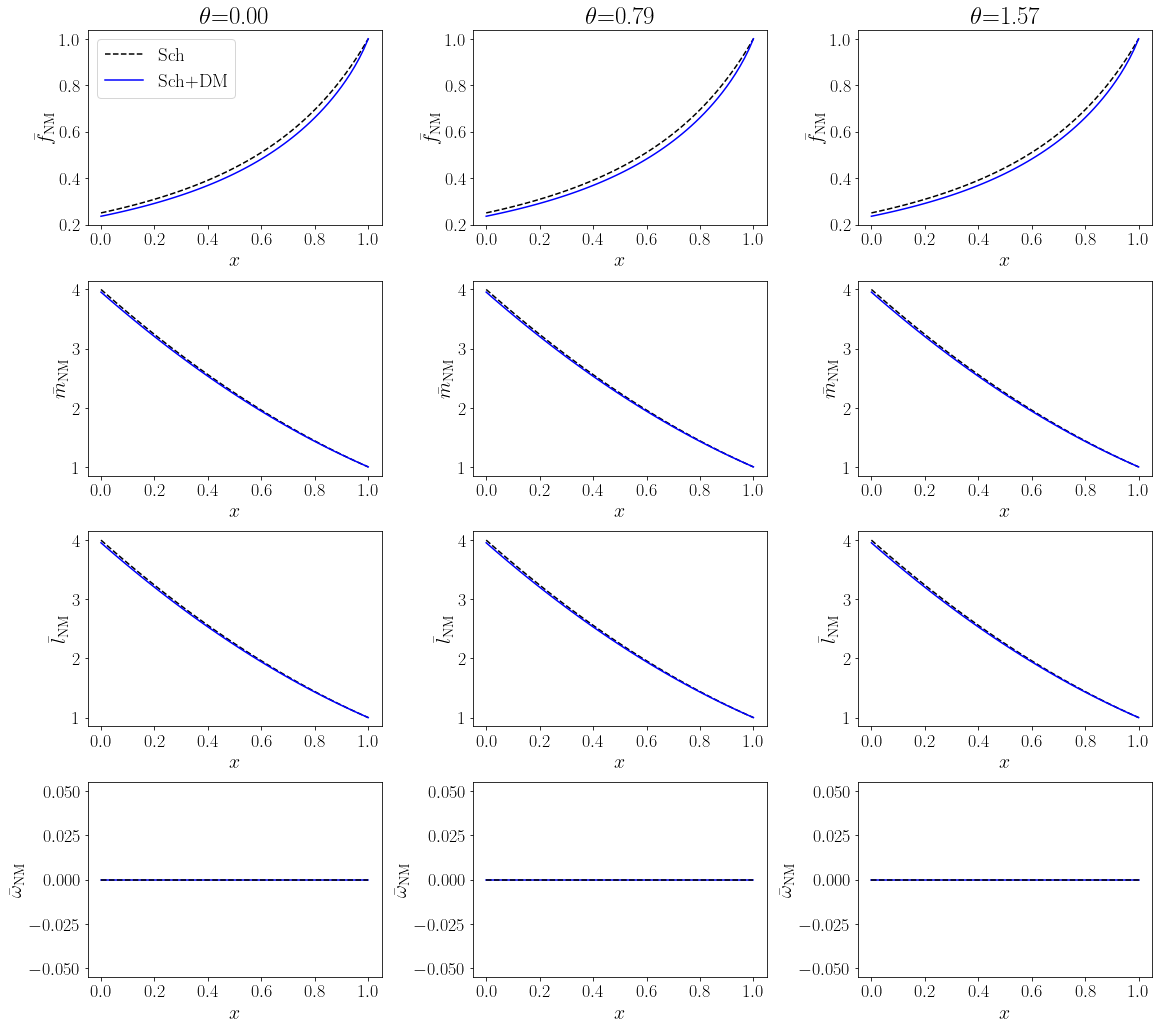

In [12]:
a0=0.0

fig=plt.figure(figsize=(5.4*3,3.6*4))
fig.subplots_adjust(hspace=0.04) 
fig.subplots_adjust(wspace=0.3) 
############################################################################################
ax=plt.subplot(431) 

number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSphe=[FGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,fnumber],'blue',ls='-',label=r'Sch+DM')


plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]),fontsize=25)
plt.ylabel(r'$\bar{f}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(432) 

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSphe=[FGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,fnumber],'blue',ls='-',label=r'Kerr+DM')

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]),fontsize=25)
plt.ylabel(r'$\bar{f}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(433) 

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSphe=[FGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,fnumber],'blue',ls='-',label=r'Kerr+DM')

plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]),fontsize=25)
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{f}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)



#2222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222222#
ax=plt.subplot(434) 
number=0

xbegin=int(xgrid*number)
xend=xbegin+xgrid

dataSphe=[MGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,mnumber],'blue',ls='-')


plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.ylabel(r'$\bar{m}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(435) 

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSphe=[MGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,mnumber],'blue',ls='-',label=r'Kerr+DM')

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.ylabel(r'$\bar{m}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(436) 

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSphe=[MGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,mnumber],'blue',ls='-',label=r'Kerr+DM')

# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{m}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)




#33333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333#
ax=plt.subplot(437) 
number=0

xbegin=int(xgrid*number)
xend=xbegin+xgrid

dataSphe=[LGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,lnumber],'blue',ls='-')


plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.ylabel(r'$\bar{l}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(438) 

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSphe=[LGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,lnumber],'blue',ls='-',label=r'Kerr+DM')

plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.ylabel(r'$\bar{l}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(439) 

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSphe=[LGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,lnumber],'blue',ls='-',label=r'Kerr+DM')

# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{l}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)


#444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444#
ax=plt.subplot(4,3,10) 
number=0

xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,wnumber],'blue',ls='-')
dataSphe=[WGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')



plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.ylabel(r'$\bar{\omega}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='upper left',fontsize=19)
############################################################################################
ax=plt.subplot(4,3,11) 

number=ygrid//2
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,wnumber],'blue',ls='-',label=r'Kerr+DM')
dataSphe=[WGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')


plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.ylabel(r'$\bar{\omega}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
# plt.legend(loc='lower left',fontsize=19)

############################################################################################
ax=plt.subplot(4,3,12) 

number=ygrid-1
xbegin=int(xgrid*number)
xend=xbegin+xgrid
plt.plot(dataSpheDM[xbegin:xend,0],dataSpheDM[xbegin:xend,wnumber],'blue',ls='-',label=r'Sch+DM')
dataSphe=[WGRbar(x,dataSpheDM[xbegin,1],a0,1) for x in dataSpheDM[xbegin:xend,0]]
plt.plot(dataSpheDM[xbegin:xend,0],dataSphe,'black',ls='--',label=r'Sch')


# plt.title(r'$\theta$={:.2f}'.format(dataKerr[xbegin,1]))
plt.xticks([0,0.2,0.4,0.6,0.8,1.0])
plt.tick_params(labelsize=18)
plt.ylabel(r'$\bar{\omega}_{\rm NM}$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)


# plt.legend(loc='lower left',fontsize=19)
plt.tight_layout()
plt.savefig('SchvsDMSch.pdf')
plt.savefig('SchvsDMSch.jpg')
plt.show()

In [14]:
number=0
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSpheDM[xbegin:xend,fnumber]

array([0.235599  , 0.23957547, 0.24365388, 0.24783775, 0.25213075,
       0.25653675, 0.26105976, 0.26570398, 0.2704738 , 0.27537382,
       0.28040885, 0.28558393, 0.29090434, 0.2963756 , 0.30200352,
       0.30779418, 0.31375398, 0.31988963, 0.32620818, 0.33271705,
       0.33942405, 0.34633741, 0.35346577, 0.36081829, 0.36840459,
       0.37623487, 0.38431989, 0.39267102, 0.40130034, 0.41022061,
       0.4194454 , 0.42898912, 0.43886708, 0.44909562, 0.45969212,
       0.4706752 , 0.48206475, 0.49388212, 0.50615022, 0.51889378,
       0.53213947, 0.54591621, 0.56025544, 0.57519152, 0.59076212,
       0.60700884, 0.62397787, 0.64172095, 0.66029652, 0.67977139,
       0.70022291, 0.72174213, 0.74443822, 0.76844519, 0.79393209,
       0.82111931, 0.85030565, 0.88191569, 0.9165876 , 0.95534872,
       1.        ])

In [15]:
number=10
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSpheDM[xbegin:xend,fnumber]

array([0.235599  , 0.23957547, 0.24365388, 0.24783775, 0.25213075,
       0.25653675, 0.26105976, 0.26570398, 0.2704738 , 0.27537382,
       0.28040885, 0.28558393, 0.29090434, 0.2963756 , 0.30200352,
       0.30779418, 0.31375398, 0.31988963, 0.32620818, 0.33271705,
       0.33942405, 0.34633741, 0.35346577, 0.36081829, 0.36840459,
       0.37623487, 0.38431989, 0.39267102, 0.40130034, 0.41022061,
       0.4194454 , 0.42898912, 0.43886708, 0.44909562, 0.45969212,
       0.4706752 , 0.48206475, 0.49388212, 0.50615022, 0.51889378,
       0.53213947, 0.54591621, 0.56025544, 0.57519152, 0.59076212,
       0.60700884, 0.62397787, 0.64172095, 0.66029652, 0.67977139,
       0.70022291, 0.72174213, 0.74443822, 0.76844519, 0.79393209,
       0.82111931, 0.85030565, 0.88191569, 0.9165876 , 0.95534872,
       1.        ])

In [17]:
number=10
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSpheDM[xbegin:xend,[0,mnumber]]

array([[0.        , 3.95510698],
       [0.01666667, 3.88946631],
       [0.03333333, 3.8243812 ],
       [0.05      , 3.75985165],
       [0.06666667, 3.69587767],
       [0.08333333, 3.63245926],
       [0.1       , 3.56959641],
       [0.11666667, 3.50728915],
       [0.13333333, 3.44553747],
       [0.15      , 3.38434138],
       [0.16666667, 3.3237009 ],
       [0.18333333, 3.26361603],
       [0.2       , 3.20408678],
       [0.21666667, 3.14511319],
       [0.23333333, 3.08669525],
       [0.25      , 3.02883299],
       [0.26666667, 2.97152643],
       [0.28333333, 2.91477561],
       [0.3       , 2.85858053],
       [0.31666667, 2.80294125],
       [0.33333333, 2.74785779],
       [0.35      , 2.69333019],
       [0.36666667, 2.63935849],
       [0.38333333, 2.58594274],
       [0.4       , 2.533083  ],
       [0.41666667, 2.48077932],
       [0.43333333, 2.42903175],
       [0.45      , 2.37784039],
       [0.46666667, 2.32720528],
       [0.48333333, 2.27712654],
       [0.

In [18]:
number=10
xbegin=int(xgrid*number)
xend=xbegin+xgrid
dataSpheDM[xbegin:xend,[0,fnumber]]

array([[0.        , 0.235599  ],
       [0.01666667, 0.23957547],
       [0.03333333, 0.24365388],
       [0.05      , 0.24783775],
       [0.06666667, 0.25213075],
       [0.08333333, 0.25653675],
       [0.1       , 0.26105976],
       [0.11666667, 0.26570398],
       [0.13333333, 0.2704738 ],
       [0.15      , 0.27537382],
       [0.16666667, 0.28040885],
       [0.18333333, 0.28558393],
       [0.2       , 0.29090434],
       [0.21666667, 0.2963756 ],
       [0.23333333, 0.30200352],
       [0.25      , 0.30779418],
       [0.26666667, 0.31375398],
       [0.28333333, 0.31988963],
       [0.3       , 0.32620818],
       [0.31666667, 0.33271705],
       [0.33333333, 0.33942405],
       [0.35      , 0.34633741],
       [0.36666667, 0.35346577],
       [0.38333333, 0.36081829],
       [0.4       , 0.36840459],
       [0.41666667, 0.37623487],
       [0.43333333, 0.38431989],
       [0.45      , 0.39267102],
       [0.46666667, 0.40130034],
       [0.48333333, 0.41022061],
       [0.